<a href="https://colab.research.google.com/github/YCTsai1997/100_Days_of_Code_The_Complete_Python_Pro_Bootcamp_for_2022/blob/main/Homework_1_Student_Version_FALL_2024_Yi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Homework 1: Data Wrangling and Cleaning: Fall 2024
_Due: Tuesday, September 17th, 11:59 PM EST_

Hello future data scientists and welcome to CIS 5450! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across three sections and a fourth section focusing on XPath!

1. Working with [Amazon Prime Video Data](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies) to understand the details behind its titles

2. Working on merged/joined versions of the datasets (more on this later though).

**IMPORTANT NOTE: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved**


Run the following 4 cells to setup the notebook

In [1]:
%set_env HW_ID=cis5450o_fall24_HW1

env: HW_ID=cis5450o_fall24_HW1


In [2]:
%%capture
!pip install penngrader-client

In [3]:
from penngrader.grader import *
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import json
import re
import os
import ast

In [4]:
!wget -nc https://storage.googleapis.com/penn-cis5450/credits.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/titles.csv

--2024-09-17 21:41:21--  https://storage.googleapis.com/penn-cis5450/credits.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5983039 (5.7M) [text/csv]
Saving to: ‘credits.csv’

credits.csv         100%[===================>]   5.71M  --.-KB/s    in 0.1s    

2024-09-17 21:41:22 (48.6 MB/s) - ‘credits.csv’ saved [5983039/5983039]

--2024-09-17 21:41:22--  https://storage.googleapis.com/penn-cis5450/titles.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3885461 (3.7M) [text/csv]
Saving to: ‘titles.csv’

titles.csv          100%[===================>]

#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matrices and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri.
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [5]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 19336558

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [6]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [7]:
grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 19336558

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works.

#### **PennGrader Check [2 points]**
- Change `favorite_activity` to whichever panda "activity" you prefer. You should assign just one of the activities to the <favorite_activity> variable. (2 points)

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (for example, look at how 1.2 is set up for your reference).
- Make sure to read these carefully and do everything that is asked.
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Ed Discussion so that we can update the Markdown cells here.

In [8]:
# In this cell, put which panda activity you prefer in lowercase - either “eating” or “sleeping”
# Input activity name in all lowercase
favorite_activity = "eating"

In [9]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat.

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image:

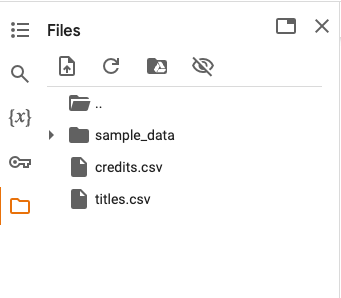



#Part 1: Working with Amazon Prime Video Data [42 points]

In this part of the homework we will be working with a dataset focused on Amazon Prime Video Movie Data!

##1.0 Loading in Titles data (2 points)

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Credits dataframe to a variable named: <code>credits_df</code>
- Save the Titles dataframe to a variable named: <code>titles_df</code>

In [10]:
#TODO: Import your two files to pandas dataframes -- make sure the dataframes are named correctly!
credits_df = pd.read_csv('credits.csv')
titles_df = pd.read_csv('titles.csv')

Let's focus on the `titles_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [11]:
#TODO: Display the first 10 rows of `titles_df`
titles_df.head(10)

id                        title   type  \
0   ts20945            The Three Stooges   SHOW   
1   tm19248                  The General  MOVIE   
2   tm82253  The Best Years of Our Lives  MOVIE   
3   tm83884              His Girl Friday  MOVIE   
4   tm56584            In a Lonely Place  MOVIE   
5  tm160494                   Stagecoach  MOVIE   
6   tm87233        It's a Wonderful Life  MOVIE   
7   tm19424                       Detour  MOVIE   
8  tm116781               My Man Godfrey  MOVIE   
9  tm112005                    Marihuana  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   
5  A group of people traveling on a stagecoach fi...          1939   
6  A holiday favourite for generations...  George...          1946   
7  The life of Al Roberts, a pianist in a New Yor...          1945   
8  Fifth Avenue socialite Irene Bullock needs a "...          1936   
9  A young girl named Burma attends a beach party...          1936   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   
5               NaN       96   
6                PG      130   
7               NaN       66   
8               NaN       95   
9               NaN       57   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   
3                     ['comedy', 'drama', 'romance']               ['US']   
4                   ['thriller', 'drama', 'romance']               ['US']   
5                               ['western', 'drama']               ['US']   
6  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
7                     ['thriller', 'drama', 'crime']               ['US']   
8                     ['comedy', 'romance', 'drama']               ['US']   
9                                 ['crime', 'drama']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0     26.0  tt0850645         8.6      1092.0           15.424         7.6  
1      NaN  tt0017925         8.2     89766.0            8.647         8.0  
2      NaN  tt0036868         8.1     63026.0            8.435         7.8  
3      NaN  tt0032599         7.8     57835.0           11.270         7.4  
4      NaN  tt0042593         7.9     30924.0            8.273         7.6  
5      NaN  tt0031971         7.8     48149.0           11.786         7.7  
6      NaN  tt0038650         8.6    444243.0           26.495         8.3  
7      NaN  tt0037638         7.3     17233.0            7.757         7.2  
8      NaN  tt0028010         8.0     23532.0            8.633         7.6  
9      NaN  tt0026683         4.0       864.0            3.748         3.6

Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `titles_df` in this cell below.

In [12]:
# TODO: Display the datatypes in `titles_df`
titles_df.dtypes


id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Save the types of the `type`, `release_year`, `runtime`, `seasons`, `imdb_id`, and `tmdb_score` columns to a series called `titles_df_types` (retaining the index names) and pass them into the autograder cell below.

In [13]:
# View the output here!
titles_df_types = titles_df[['type', 'release_year', 'runtime', 'seasons', 'imdb_id', 'tmdb_score']].dtypes
titles_df_types

type             object
release_year      int64
runtime           int64
seasons         float64
imdb_id          object
tmdb_score      float64
dtype: object

In [14]:
# TEST CASE: titles_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'titles_df_types', answer = titles_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Cleaning up Titles data (5 points)

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `titles_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `titles_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns:
 `id`, `title`, `type`, `release_year`, `runtime`, `genres`, `production_countries`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.
- Drop rows that have nulls (e.g. NaN) in them.
Use the [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function to see the number of null rows in this DataFrame before this, and afterward to sense check that your operation is correct
- Reset the index and drop the `index` column which stores the original index prior to resetting the index. We recommend you print out the intermediate dataframe prior to this to see that the indices are not consecutive!
- Cast `title`, `type` to type `string`, and `imdb_votes` to type `int`.
- Save the result to `titles_cleaned_df`.

In [15]:
#TODO: Keep only the necessary columns
titles_cleaned_df = titles_df[['id', 'title', 'type', 'release_year', 'runtime', 'genres', 'production_countries', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]

In [16]:
titles_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   release_year          9871 non-null   int64  
 4   runtime               9871 non-null   int64  
 5   genres                9871 non-null   object 
 6   production_countries  9871 non-null   object 
 7   imdb_score            8850 non-null   float64
 8   imdb_votes            8840 non-null   float64
 9   tmdb_popularity       9324 non-null   float64
 10  tmdb_score            7789 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 848.4+ KB


In [17]:
#TODO: Drop nulls
titles_cleaned_df.dropna(inplace=True)

<ipython-input-17-5890aec2b4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned_df.dropna(inplace=True)


In [18]:
titles_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 0 to 9864
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7317 non-null   object 
 1   title                 7317 non-null   object 
 2   type                  7317 non-null   object 
 3   release_year          7317 non-null   int64  
 4   runtime               7317 non-null   int64  
 5   genres                7317 non-null   object 
 6   production_countries  7317 non-null   object 
 7   imdb_score            7317 non-null   float64
 8   imdb_votes            7317 non-null   float64
 9   tmdb_popularity       7317 non-null   float64
 10  tmdb_score            7317 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 686.0+ KB


In [19]:
#TODO: Reset and drop the index
titles_cleaned_df.reset_index(drop=True, inplace=True)

In [20]:
titles_cleaned_df

id                        title   type  release_year  runtime  \
0       ts20945            The Three Stooges   SHOW          1934       19   
1       tm19248                  The General  MOVIE          1926       78   
2       tm82253  The Best Years of Our Lives  MOVIE          1946      171   
3       tm83884              His Girl Friday  MOVIE          1940       92   
4       tm56584            In a Lonely Place  MOVIE          1950       94   
...         ...                          ...    ...           ...      ...   
7312   tm616953                Ammaa Ki Boli  MOVIE          2021      117   
7313  tm1068475                     Alleyway  MOVIE          2021       67   
7314  tm1098070              Girls' Night In  MOVIE          2021       91   
7315  tm1019060                 Anbirkiniyal  MOVIE          2021      118   
7316   tm822572        Gun and a Hotel Bible  MOVIE          2021       58   

                                                 genres production_countries  \
0     ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1     ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                           ['romance', 'war', 'drama']               ['US']   
3                        ['comedy', 'drama', 'romance']               ['US']   
4                      ['thriller', 'drama', 'romance']               ['US']   
...                                                 ...                  ...   
7312                                ['comedy', 'drama']               ['IN']   
7313                    ['action', 'crime', 'thriller']                   []   
7314                                ['comedy', 'drama']               ['US']   
7315                              ['thriller', 'drama']               ['IN']   
7316                                          ['drama']                   []   

      imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0            8.6      1092.0           15.424         7.6  
1            8.2     89766.0            8.647         8.0  
2            8.1     63026.0            8.435         7.8  
3            7.8     57835.0           11.270         7.4  
4            7.9     30924.0            8.273         7.6  
...          ...         ...              ...         ...  
7312         7.3      1335.0            2.382         1.0  
7313         5.4        92.0            1.870         6.8  
7314         2.8        28.0            1.306         7.0  
7315         6.8       361.0            2.191         7.0  
7316         4.0       142.0            0.954         6.5  

[7317 rows x 11 columns]

In [21]:
#TODO: Cast type
# Starting with Pandas version 1.0.0, there is an official StringDtype, which you can use to ensure columns are treated as string-specific types.
titles_cleaned_df['title'] = titles_cleaned_df['title'].astype('string') #in Pandas, the object data type is used for string data
titles_cleaned_df['type'] = titles_cleaned_df['type'].astype('string')
titles_cleaned_df['imdb_votes'] = titles_cleaned_df['imdb_votes'].astype(int) #NaN removed above, or we can add fillna(0)

<ipython-input-21-ea371bd94a30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned_df['title'] = titles_cleaned_df['title'].astype('string') #in Pandas, the object data type is used for string data
<ipython-input-21-ea371bd94a30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned_df['type'] = titles_cleaned_df['type'].astype('string')
<ipython-input-21-ea371bd94a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [22]:
titles_cleaned_df.dtypes

id                              object
title                   string[python]
type                    string[python]
release_year                     int64
runtime                          int64
genres                          object
production_countries            object
imdb_score                     float64
imdb_votes                       int64
tmdb_popularity                float64
tmdb_score                     float64
dtype: object

In [23]:
# TEST CASE: titles_cleaned_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'titles_cleaned_df', answer = titles_cleaned_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.




##1.2 Data Wrangling with Titles Data (8 points)

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `titles_cleaned_df` for this part.

**TODO: 1.2**

*  Create a column called `is_movie` that contains a value of **1** if the type of content is MOVIE and a value of **0** if not.
* Create the `genres_expanded` column to create individual rows for each genre of each title. Hint: Make sure it is the correct type before doing this!
* Similar to before, create a `production_countries_expanded` column to create individual rows for each country where the title was produced.
* Drop the redundant columns `type`, `genres`,  and `production_countries`, as well as all Na values, saving the result as `titles_final_df`. Make sure to reset and drop the index as well! (8 points)


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), [explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html), [json.loads](https://www.geeksforgeeks.org/json-loads-in-python/), `lambda` and [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) in Python documentation.

In [24]:
titles_cleaned_df.head(5)

id                        title   type  release_year  runtime  \
0  ts20945            The Three Stooges   SHOW          1934       19   
1  tm19248                  The General  MOVIE          1926       78   
2  tm82253  The Best Years of Our Lives  MOVIE          1946      171   
3  tm83884              His Girl Friday  MOVIE          1940       92   
4  tm56584            In a Lonely Place  MOVIE          1950       94   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   
3                     ['comedy', 'drama', 'romance']               ['US']   
4                   ['thriller', 'drama', 'romance']               ['US']   

   imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0         8.6        1092           15.424         7.6  
1         8.2       89766            8.647         8.0  
2         8.1       63026            8.435         7.8  
3         7.8       57835           11.270         7.4  
4         7.9       30924            8.273         7.6

In [25]:
#TODO: Create is_movie
titles_cleaned_df['is_movie'] = titles_cleaned_df['type'].apply(lambda x: 1 if x == 'MOVIE' else 0)

<ipython-input-25-64e7e16d78f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned_df['is_movie'] = titles_cleaned_df['type'].apply(lambda x: 1 if x == 'MOVIE' else 0)


In [26]:
titles_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7317 non-null   object 
 1   title                 7317 non-null   string 
 2   type                  7317 non-null   string 
 3   release_year          7317 non-null   int64  
 4   runtime               7317 non-null   int64  
 5   genres                7317 non-null   object 
 6   production_countries  7317 non-null   object 
 7   imdb_score            7317 non-null   float64
 8   imdb_votes            7317 non-null   int64  
 9   tmdb_popularity       7317 non-null   float64
 10  tmdb_score            7317 non-null   float64
 11  is_movie              7317 non-null   int64  
dtypes: float64(3), int64(4), object(3), string(2)
memory usage: 686.1+ KB


In [27]:
#TODO: Create genres_expanded
titles_cleaned_df = titles_cleaned_df.assign(genres_expanded=titles_cleaned_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)).explode('genres_expanded')

In [28]:
#TODO: production_countries_expanded
titles_cleaned_df = titles_cleaned_df.assign(production_countries=titles_cleaned_df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
titles_cleaned_df = titles_cleaned_df.explode('production_countries')
titles_cleaned_df.rename(columns={'production_countries': 'production_countries_expanded'}, inplace=True)

In [29]:
titles_cleaned_df.head(3)

id              title  type  release_year  runtime  \
0  ts20945  The Three Stooges  SHOW          1934       19   
0  ts20945  The Three Stooges  SHOW          1934       19   
0  ts20945  The Three Stooges  SHOW          1934       19   

                                              genres  \
0  ['comedy', 'family', 'animation', 'action', 'f...   
0  ['comedy', 'family', 'animation', 'action', 'f...   
0  ['comedy', 'family', 'animation', 'action', 'f...   

  production_countries_expanded  imdb_score  imdb_votes  tmdb_popularity  \
0                            US         8.6        1092           15.424   
0                            US         8.6        1092           15.424   
0                            US         8.6        1092           15.424   

   tmdb_score  is_movie genres_expanded  
0         7.6         0          comedy  
0         7.6         0          family  
0         7.6         0       animation

In [30]:
#TODO: Drop redundant columns, nulls, and the index
titles_cleaned_df.drop(columns=['type', 'genres'], inplace=True)
titles_cleaned_df.dropna(inplace=True)
titles_cleaned_df.reset_index(drop=True, inplace=True)
titles_final_df = titles_cleaned_df

In [31]:
# TEST CASE: titles_final_df (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'titles_final_df', answer = titles_final_df)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Compute the Top Performing Genres

###1.3.1 Compute the Best Genres By IMDb and TMDb Score (6 points)

In this section we will compute the top performing genres, and will use both data from the Internet Movie Database (IMDb) and The Movie Database (TMDb) to do so. We will use `titles_final_df` in this section.


**TODO: 1.3.1**
*   Create a dataframe `genres` with only the columns `genres_expanded`, `tmdb_popularity`, `imdb_score` and `tmdb_score`.
* Filter `genres` to only keep those titles with `tmdb_popularity` greater than 2.0.
* Create a dataframe `genres_imdb_df` that contains the average imdb_score for each genre. Make sure to keep the resultant `genres_expanded` and `imdb_score` columns
* Sort this in descending order using `imdb_score`, keeping only the top 10 values
* Create a column called `score` that is the average score rounded to two decimal places
* Reset the index and drop the `index` column
* Return only `score` and `genres_expanded` as part of `genres_imdb_df`
* Do the same steps for creating `genres_imdb_df` to create `genres_tmdb_df` with `tmdb_score` instead!



In [32]:
#TODO: Create genres
genres = titles_final_df[['genres_expanded', 'tmdb_popularity', 'imdb_score', 'tmdb_score']]

## Filter genres to only keep those titles with tmdb_popularity greater than 2.0.
genres =genres[genres['tmdb_popularity'] > 2.0]

In [33]:
#TODO: Create genres_imdb_df

## Create a dataframe genres_imdb_df that contains the average imdb_score for each genre. Make sure to keep the resultant genres_expanded and imdb_score columns
genres_imdb_df = genres.groupby('genres_expanded')['imdb_score'].mean().reset_index()

## Sort this in descending order using imdb_score, keeping only the top 10 values
genres_imdb_df = genres_imdb_df.sort_values(by='imdb_score', ascending=False).head(10)

## Create a column called score that is the average score rounded to two decimal places
genres_imdb_df['score'] = genres_imdb_df['imdb_score'].round(2)

## Reset the index and drop the index column
genres_imdb_df.reset_index(drop=True, inplace=True)

## Return only score and genres_expanded as part of genres_imdb_df
genres_imdb_df = genres_imdb_df[['score', 'genres_expanded']]

In [34]:
genres_imdb_df

score genres_expanded
0   6.99   documentation
1   6.77         history
2   6.73         reality
3   6.66             war
4   6.44           sport
5   6.43       animation
6   6.40           music
7   6.37        european
8   6.30           drama
9   6.21         romance

In [35]:
#TODO: Create genres_tmdb_df
genres_tmdb_df = genres.groupby('genres_expanded')['tmdb_score'].mean().reset_index()
genres_tmdb_df = genres_tmdb_df.sort_values('tmdb_score', ascending=False).head(10)
genres_tmdb_df['score'] = genres_tmdb_df['tmdb_score'].round(2)
genres_tmdb_df.reset_index(drop=True, inplace=True)
genres_tmdb_df = genres_tmdb_df[['score', 'genres_expanded']]

In [36]:
genres_tmdb_df

score genres_expanded
0   7.00       animation
1   6.84         reality
2   6.80   documentation
3   6.66         history
4   6.50          family
5   6.50             war
6   6.44           sport
7   6.39           music
8   6.35        european
9   6.28           drama

In [37]:
# TEST CASE: genres_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'genres_df', answer = (genres_imdb_df, genres_tmdb_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.3.2 Compute the Percentage Difference Between Genres (4 points)

In this section we will compute the differences in results between `genres_imdb_df` and `genres_tmdb_df`.

**TODO: 1.3.2**
*   Merge `genres_imdb_df` and `genres_tmdb_df` on `genres_expanded` to create `merged_df`. Use the fact that we want to calculate differences between the results to decide the type of merge you use!
* Rename the `score` columns to `score_imdb` and `score_tmdb` respectively
* Create a column `difference` in `merged_df` that is defined the absolute value of the percentage difference between `score_imdb` and `score_tmdb`. Hint: Check out the [abs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.abs.html/) function for help with this!
Use the following formula for this:
\begin{align}
difference = abs(\frac{scoreimdb - scoretmdb}{scoreimdb})*100
\end{align}
* Sort `merged_df` in descending order by `difference`
* Reset the index and drop the index

Expected Schema for `merged_df`:

genres_expanded | score_imdb | tmdb | difference




In [38]:
#TODO: Create merged_df
merged_df = genres_imdb_df.merge(genres_tmdb_df, on='genres_expanded', how='inner')
merged_df.rename(columns={'score_x': 'score_imdb', 'score_y': 'score_tmdb'}, inplace=True)
merged_df['difference'] = (abs(merged_df['score_imdb'] - merged_df['score_tmdb']) / merged_df['score_imdb']) * 100
merged_df.sort_values('difference', ascending=False, inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [39]:
# TEST CASE: merged_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'merged_df', answer = merged_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Finding Title Variation By Decade

In this section we will compute the performance of titles by decade. We will first use `titles_final_df` to create `titles_intermediate_df` containing only unique titles that will be used throughout this section.

**TODO: 1.4**

*   Drop `genres_expanded` and `production_countries_expanded` to create `titles_intermediate_df`
*   Drop duplicate rows
*   Create a column `decade` that represents the decade the movie has been released. For example, if `release_year` is 1994, the `decade` should return 1990.

In [40]:
#TODO: Create titles_intermediate_df
titles_intermediate_df = titles_final_df.drop(columns=['genres_expanded', 'production_countries_expanded'])
titles_intermediate_df = titles_intermediate_df.drop_duplicates()
titles_intermediate_df['decade'] = titles_intermediate_df['release_year'].apply(lambda x: (x // 10) * 10)

###1.4.1 Compute Bottom Movie Decades  (5 points)

**TODO: 1.4.1**

*   See the `groupby()` function.
*   Create a dataframe `bottom_titles_df` with the percentage of movies for each decade. For example, if we have a total of 100 titles in the 1990's, 20 of them are movies, then in the `decade` 1990, we should see 20.0 in the `Percentage` column
* Reset the index and drop the column
*   Return the five lowest decades by percentage, with columns `decade` and `Percentage`

In [156]:
#TODO: Create bottom_titles_df
bottom_titles_df = titles_intermediate_df.groupby('decade').apply(lambda x: (x['is_movie'].sum() / len(x)) * 100).reset_index(name='Percentage')
bottom_titles_df = bottom_titles_df.reset_index(drop=True)
bottom_titles_df = bottom_titles_df.sort_values('Percentage').head(5)
bottom_titles_df = bottom_titles_df[['decade', 'Percentage']]

In [157]:
bottom_titles_df

decade  Percentage
11    2020   80.671141
9     2000   84.302964
10    2010   85.295017
8     1990   87.914692
7     1980   92.048930

In [158]:
# TEST CASE: bottom_titles_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'bottom_titles_df', answer = bottom_titles_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.4.2 Greatest Shift in Average Runtime  (5 points)

We now will calculate the greatest shift in average runtime between decades as a percentage
* Formula: 100*(Current Decade's AverageRunTime - Previous Decade's AverageRunTime)/Previous Decade's AverageRunTime

**TODO: 1.4.2**

*   Create a dataframe `average_runtime_df` with the percentage change of average runtime for each decade (with regard to the previous decade).
Your df should have three columns: decade, runtime and percentage_shift
*   Sort this by highest `percentage_shift` first with columns `decade`, `runtime` and `percentage_shift`. Make sure to drop nulls and reset index after!


In [44]:
#TODO: Create average_runtime_df

## GROUP BY decade and calculate average runtime
average_runtime_df = titles_intermediate_df.groupby('decade')['runtime'].mean().reset_index()

## Calculate the greatest shift in average runtime between decades as a percentage
average_runtime_df['percentage_shift'] = 100 * (average_runtime_df['runtime'].diff()) / average_runtime_df['runtime'].shift(1)

## Sort this by highest percentage_shift first with columns decade. And drop nulls and reset index
average_runtime_df.dropna(inplace=True)
average_runtime_df = average_runtime_df.sort_values('percentage_shift', ascending=False)
average_runtime_df.reset_index(drop=True, inplace=True)

average_runtime_df = average_runtime_df[['decade', 'runtime', 'percentage_shift']]

In [45]:
# TEST CASE: average_runtime_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'average_runtime_df', answer = average_runtime_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.4.3 Ratio of Length of Title to Number of Individuals  (7 points)

Adam wonders whether longer duration titles have more people working on them. He decides to see how the ratio between the length of a title and the number of people working on it has changed over time, and buckets this by `decade`. We will use `credits_df` here, and we suggest that you explore the dataset using some of the functions we used in section 1.0. We now aim to answer his question using both `titles_intermediate_df` and `credits_df`.

**TODO: 1.4.3**
*   Create a dataframe `titles_ratio_df` with a join of `titles_intermediate_df` and `credits_df` that only contains id's in both dataframes. NOTE: There are individuals that participated on the same work but in multiple roles and characters. Make sure to remove these duplicates. We want to know the actual number of individuals per work
*   Create a `ratio` column that stores the ratio of the average number of people working on a film in a decade to the average length of the title (defined as the number of characters in the string) in the decade. The formula for ratio (for a decade) is:
\begin{align}
ratio = \frac{Average Number of People Working on Film}{Average Title Length}
\end{align}
*   Round the ratio to 2 decimal places and sort the dataframe by the `ratio` column (in descending order). Store the highest ratio in the value `highest_ratio`. We have final schema `decade`, `person_id`, `title_length`, and `ratio`.


In [46]:
titles_intermediate_df.head(3)

id                        title  release_year  runtime  imdb_score  \
0   ts20945            The Three Stooges          1934       19         8.6   
6   tm19248                  The General          1926       78         8.2   
12  tm82253  The Best Years of Our Lives          1946      171         8.1   

    imdb_votes  tmdb_popularity  tmdb_score  is_movie  decade  
0         1092           15.424         7.6         0    1930  
6        89766            8.647         8.0         1    1920  
12       63026            8.435         7.8         1    1940

In [47]:
credits_df.head(3)

person_id       id        name character   role
0      59401  ts20945  Joe Besser       Joe  ACTOR
1      31460  ts20945  Moe Howard       Moe  ACTOR
2      31461  ts20945  Larry Fine     Larry  ACTOR

In [48]:
#TODO: Create titles_ratio_df and highest_ratio

#### --- Need to rolled up first, otherwise it will cause wired duplicates and not able to debug

## Remove individuals that participated on the same work but in multiple roles and characters, then count number of people per movie in credits_df
credits_unique_df = credits_df[['person_id', 'id']].drop_duplicates()
credits_rollup_df = credits_unique_df.groupby(by = 'id', as_index = False).agg({'person_id':'count'}).reset_index(drop = True)

## rolled up title and get count
titles_intermediate_df['title_length'] = titles_intermediate_df['title'].apply(len)

## Merged two tables and rolled up
titles_ratio_df = titles_intermediate_df.merge(credits_rollup_df, on='id', how='inner')
titles_ratio_df = titles_ratio_df.groupby('decade', as_index = False).agg({'person_id':'mean', 'title_length':'mean'})

## rolled up title and get count
titles_intermediate_df['title_length'] = titles_intermediate_df['title'].apply(len)

## Merged two tables and rolled up
titles_ratio_df = titles_intermediate_df.merge(credits_rollup_df, on='id', how='inner')
titles_ratio_df = titles_ratio_df.groupby('decade', as_index = False).agg({'person_id':'mean', 'title_length':'mean'})

## calculate ratio for each decade
titles_ratio_df['ratio'] = (titles_ratio_df['person_id'] / titles_ratio_df['title_length']).round(2)

## Sort ratio desc
titles_ratio_df = titles_ratio_df.sort_values(by='ratio', ascending=False)

## Store the highest ratio in the value highest_ratio. We have final schema decade, person_id, title_length, and ratio.
highest_ratio = titles_ratio_df['ratio'].iloc[0]
titles_ratio_df = titles_ratio_df[['decade', 'person_id', 'title_length', 'ratio']].reset_index(drop=True)

In [49]:
# TEST CASE: titles_ratio_df (7pt)
# [CIS 545 PennGrader Cell] - 7 points
grader.grade(test_case_id = 'titles_ratio_df', answer = (titles_ratio_df, highest_ratio))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 2: Combining the data [35 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

## 2.1 All about IMBD Votes



#### 2.1.1 IMDB votes per country (4 points)


<br>

##### TODO: 2.1.1

- Using `titles_final_df`, create a new dataframe called `new_titles_final_df` which removes the `genres_expanded` column and drops duplicates.
- Next, create `intermediate_df` which only contains movies with greater than 10,000 IMDB votes
- Add a column to `intermediate_df` called `count` that is a 1 if the IMDB score is >= 6.
- Return a dataframe called `country_votes_df` counting the number of films with IMDB scores of at least 6 for each country. There should be two columns: `country` and `count`. Return this df in sorted order by count in ascending order and country in alphabetically descending order.  

Note: You may receive a warning message, which will not affect your output or your score.

In [50]:
titles_final_df.head(3)

id              title  release_year  runtime  \
0  ts20945  The Three Stooges          1934       19   
1  ts20945  The Three Stooges          1934       19   
2  ts20945  The Three Stooges          1934       19   

  production_countries_expanded  imdb_score  imdb_votes  tmdb_popularity  \
0                            US         8.6        1092           15.424   
1                            US         8.6        1092           15.424   
2                            US         8.6        1092           15.424   

   tmdb_score  is_movie genres_expanded  
0         7.6         0          comedy  
1         7.6         0          family  
2         7.6         0       animation

In [51]:
#TODO: Create country_votes_df

## 1. Using titles_final_df, create a new dataframe called new_titles_final_df which removes the genres_expanded column and drops duplicates.(Number: 8,236)
new_titles_final_df = titles_final_df.drop(columns=['genres_expanded']).drop_duplicates()


## 2. create intermediate_df which only contains movies with greater than 10,000 IMDB votes (Number: 1,232)
intermediate_df = new_titles_final_df[(new_titles_final_df['imdb_votes'] > 10000) & (new_titles_final_df['is_movie'] == 1)]


## 3. Add a column to intermediate_df called count that is a 1 if the IMDB score is >= 6. (Number: 994)
intermediate_df['count'] = intermediate_df['imdb_score'].apply(lambda x: 1 if x >= 6 else 0)
## intermediate_df['count'] = (intermediate_df['imdb_score'] >= 6).astype(int)


## 4. Return a dataframe called country_votes_df counting the number of films with IMDB scores of at least 6 for each country.
## There should be two columns: country and count. Return this df in sorted order by count in ascending order and country in alphabetically descending order. (Number: 994)
country_votes_df = intermediate_df.groupby('production_countries_expanded', as_index=False).agg(count=('count', 'sum'))
country_votes_df = country_votes_df.sort_values(by=['count', 'production_countries_expanded'], ascending=[True, False]).reset_index(drop=True)
country_votes_df = country_votes_df.rename(columns={'production_countries_expanded': 'country'})

<ipython-input-51-ea17379bc906>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_df['count'] = intermediate_df['imdb_score'].apply(lambda x: 1 if x >= 6 else 0)


In [52]:
# TEST CASE: country_votes_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'country_votes_df', answer = country_votes_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 Most popular TV Show Actors(5 points)


TODO: Use new_titles_final_df to create an intermediate dataframe called `shows_df`, assuming all non-movies are TV shows, containing shows with at least 2000 votes. Merge `credits_df` with `shows_df` to obtain the number of IMDB votes each actor has received from all the shows they have been in, only keeping the records that appear in both dataframes. Group by `name`, and return a dataframe containing the `name` column and the `imdb_votes` column. Make sure this dataframe, top_actors_df, is sorted in decreasing order of votes

In [53]:
#TODO: Create top_actors_df

## create an intermediate dataframe called shows_df, assuming all non-movies are TV shows, containing shows with at least 2000 votes  (Row number: 366)
shows_df = new_titles_final_df[(new_titles_final_df['is_movie'] == 0) & (new_titles_final_df['imdb_votes'] >= 2000)]

## Merge (Only need actor)
credit_actor_df = credits_df[credits_df['role'] == 'ACTOR']
shows_credits_df = shows_df.merge(credit_actor_df, on='id', how='inner')

## Group by actor's name and sum votes (Row number: 2,658))
top_actors_df = shows_credits_df.groupby('name', as_index=False).agg(imdb_votes=('imdb_votes', 'sum'))
top_actors_df = top_actors_df.sort_values(by='imdb_votes', ascending=False).reset_index(drop=True)

top_actors_df

name  imdb_votes
0        Alyson Hannigan      804863
1        Michael C. Hall      791919
2     Jennifer Carpenter      791919
3               C.S. Lee      711566
4     Desmond Harrington      711566
...                  ...         ...
2653            Pom Boyd        2014
2654      Liz Fitzgibbon        2014
2655       Brian Gleeson        2014
2656          Pat Shortt        2014
2657    Domhnall Gleeson        2014

[2658 rows x 2 columns]

In [54]:
# TEST CASE: top_actors_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'top_actors_df', answer = top_actors_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 2.2 Exploring Acting

We now want to see which actors are doing well, and we first check Comedy Actors and then the Highest Ranked Actors overall.

#### 2.2.1 Comedy Actors (6 points)

TODO:

- Create a new dataframe `comedy_actors_df` that filters `titles_final_df` to only contain shows in the comedy genre (once again assuming all non-movies are shows).
- Create a `credit_actor_df` which contains just actors and remove duplicates based on `id`, `person_id`, and `name`
- Merge `comedy_actors_df` with `credit_actor_df` to obtain the actors and their associated comedy shows
- Calculate the average `imdb_votes`  of each actor
- Create a new column called `ranking` which assigns the label of "low" if an actor averages less than 10,000 votes, "med" if an actor averages between 10,000 and 100,000 votes, and "high" if an actor averages greater than 100,000 votes.
- `comedy_actors_df` should have columns `person_id`, `name`, and `imdb_votes` and  `ranking`

In [55]:
titles_final_df['genres_expanded'].unique()

array(['comedy', 'family', 'animation', 'action', 'fantasy', 'horror',
       'drama', 'war', 'western', 'european', 'romance', 'thriller',
       'crime', 'history', 'sport', 'scifi', 'documentation', 'music',
       'reality'], dtype=object)

In [56]:
credits_df.head(3)

person_id       id        name character   role
0      59401  ts20945  Joe Besser       Joe  ACTOR
1      31460  ts20945  Moe Howard       Moe  ACTOR
2      31461  ts20945  Larry Fine     Larry  ACTOR

In [57]:
#TODO: Create comedy_actors_df
comedy_actors_df = titles_final_df[(titles_final_df['is_movie']== 0) & (titles_final_df['genres_expanded'] == 'comedy')]
credit_actor_df = credits_df[credits_df['role'] == 'ACTOR'][['id', 'person_id', 'name']].drop_duplicates()
comedy_actors_df = comedy_actors_df.merge(credit_actor_df, on='id', how='inner')
comedy_actors_df = comedy_actors_df.groupby(['person_id', 'name'], as_index=False).agg(avg_imdb_votes=('imdb_votes', 'mean'))

def assign_ranking(votes):
    if votes < 10000:
        return "low"
    elif 10000 <= votes <= 100000:
        return "med"
    else:
        return "high"

comedy_actors_df['ranking'] = comedy_actors_df['avg_imdb_votes'].apply(assign_ranking)
comedy_actors_df = comedy_actors_df[['person_id', 'name', 'avg_imdb_votes', 'ranking']]
comedy_actors_df.rename(columns={'avg_imdb_votes': 'imdb_votes'}, inplace=True)
comedy_actors_df

person_id              name  imdb_votes ranking
0             7      Tamsin Greig    17634.00     med
1            10       Darren Boyd     7332.00     low
2            48          Tom Kane     3244.00     low
3            61       Ryan Hansen    30771.00     med
4           121       Mamiko Noto     8939.75     low
...         ...               ...         ...     ...
2256    2256489  Elisabeth Hadley      350.00     low
2257    2276175  Miguel Pérez Gil      509.00     low
2258    2286488     Sofía Morandi      386.00     low
2259    2293359          Wei Xiao      460.00     low
2260    2316743  Scott Rose-Marsh     7332.00     low

[2261 rows x 4 columns]

In [58]:
# TEST CASE: comedy_actors_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'comedy_actors_df', answer = comedy_actors_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####2.2.2 Finding Highest Ranked Actors  (6 points)

We want to find the actors who have received the "high" ranking for both the comedy and drama genre without duplicates. Use the same logic as the previous question to obtain the highest ranked actors for the drama category, and find the actors that appear as highly ranked for both genres. Return this as an alphabetically ranked list called `highest_ranked` with actor names ensuring that there are no duplicates.

In [59]:
comedy_high_actors_df = comedy_actors_df[comedy_actors_df['ranking'] == 'high']
comedy_high_actors_df

person_id                name  imdb_votes ranking
29          322       Olivia Colman    139749.0    high
62          918           Omar Epps    448480.0    high
66         1231    John C. McGinley    251172.0    high
72         1511       Amanda Schull    395600.0    high
76         1682  Giancarlo Esposito    404920.0    high
...         ...                 ...         ...     ...
1634     249249     Jenny Rainsford    139749.0    high
1695     296870     Jessie T. Usher    182464.5    high
1804     591265      Claudia Doumit    362539.0    high
1968     861656    Matilda Szydagis    108795.0    high
1969     861658      Nunzio Pascale    108795.0    high

[82 rows x 4 columns]

In [60]:
#TODO: Create highest_ranked
drama_actors_df = titles_final_df[(titles_final_df['is_movie']== 0) & (titles_final_df['genres_expanded'] == 'drama')]
credit_actor_df = credits_df[credits_df['role'] == 'ACTOR'][['id', 'person_id', 'name']].drop_duplicates()
drama_actors_df = drama_actors_df.merge(credit_actor_df, on='id', how='inner')
drama_actors_df = drama_actors_df.groupby(['person_id', 'name'])['imdb_votes'].mean().reset_index()

drama_actors_df['ranking'] = drama_actors_df['imdb_votes'].apply(assign_ranking)

## Row number: 82
drama_high_actors_df = drama_actors_df[drama_actors_df['ranking'] == 'high']
comedy_high_actors_df = comedy_actors_df[comedy_actors_df['ranking'] == 'high']
highest_ranked_df = pd.merge(comedy_high_actors_df, drama_high_actors_df, on=['person_id', 'name'], how='inner')
highest_ranked = sorted(highest_ranked_df['name'].unique())

In [61]:
# TEST CASE: highest_ranked (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'highest_ranked', answer = highest_ranked)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 2.3 Oscars: Finding the Best of Each Category!

Let's now look at those who did the best in their profession, as well as those who improved well

#### 2.3.1 Finding the Best of Each Profession (8 points)

Use `titles_intermediate_df` and `credits_df` in this question. For each profession in `credits_df`, do the following:

-  Find the average `imdb_score` for each person each proession, make sure to there are at least 5 appearances for each person for each profession.
- Append the name and score of the person with the highest `imdb_score` to lists `best_role_names` and `best_role_values` respectively. For example, `best_role_names = [Martin Scorsese, Leonardo DiCaprio, Meryl Streep]` and `best_role_values = [8.3, 8.1, 8.6]`

Hint: Check the [unique](https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns/) function for help with finding the various professions!

In [63]:
credits_df.head(3)

person_id       id        name character   role
0      59401  ts20945  Joe Besser       Joe  ACTOR
1      31460  ts20945  Moe Howard       Moe  ACTOR
2      31461  ts20945  Larry Fine     Larry  ACTOR

In [109]:
actor_df

person_id              name   role  appreance_count
14            46       Jack La Rue  ACTOR               12
31           121       Mamiko Noto  ACTOR                6
34           132       Daisuke Ono  ACTOR                5
38           138  Takahiro Sakurai  ACTOR               12
39           140      Ayane Sakura  ACTOR                5
...          ...               ...    ...              ...
79709    2126745     Meesam Suresh  ACTOR                5
80034    2161480       Rajiv Gupta  ACTOR                6
80761    2255730  Karuppu Nambiyar  ACTOR                5
80845    2266739        Tim Rooney  ACTOR                6
81419    2355552     Rajesh Balraj  ACTOR                5

[2766 rows x 4 columns]

In [104]:

credits_role_df = credits_df.groupby(['person_id','name','role']).agg(appreance_count = ('id','count')).reset_index()
actor_df = credits_role_df[(credits_role_df['role'] == 'ACTOR') & (credits_role_df['appreance_count'] >= 5)]
director_df = credits_role_df[(credits_role_df['role'] == 'DIRECTOR') & (credits_role_df['appreance_count'] >= 5)]
credits_role_df = actor_df.merge(director_df, on='person_id', how = 'inner')
credits_role_df = credits_role_df.get(['person_id','name_x'])
credits_role_df.rename(columns={'name_x': 'name'}, inplace=True)
credits_role_df

person_id                    name
0       3308         Martin Scorsese
1      16172             Woody Allen
2      30171     Anthony C. Ferrante
3     132942          Robert F. Hill
4    1024597  Steven 'Prozak' Shippy

In [123]:
# TODO: Create best_role_names and best_role_values
## Find name with at least 5 appearances for each person for each profession

# Initialize lists to store the best person for each profession
best_role_names = []
best_role_values = []

# Step 1: Merge credits_df with titles_intermediate_df to get IMDb scores
merged_df = credits_df.merge(titles_intermediate_df[['id', 'imdb_score']], on='id', how='inner')

# Step 2: Define the roles (ACTOR and DIRECTOR) we're interested in
roles = ['ACTOR', 'DIRECTOR']

# Step 3: For each profession, calculate the average IMDb score for each person
for role in roles:
    # Filter for the current role (ACTOR or DIRECTOR)
    role_df = merged_df[merged_df['role'] == role]

    # Group by person_id and person_name, and calculate the average IMDb score and the number of appearances
    person_avg_df = role_df.groupby(['person_id', 'name']).agg(
        avg_imdb_score=('imdb_score', 'mean'),
        appearance_count=('id', 'count')
    ).reset_index()

    # Step 4: Filter for people with at least 5 appearances in this profession
    person_avg_df = person_avg_df[person_avg_df['appearance_count'] >= 5]

    # Step 5: Find the person with the highest average IMDb score
    if not person_avg_df.empty:
        best_person = person_avg_df.loc[person_avg_df['avg_imdb_score'].idxmax()]

        # Append the name and IMDb score of the best person to the lists
        best_role_names.append(best_person['name'])
        best_role_values.append(best_person['avg_imdb_score'])


In [124]:
# TEST CASE: best_roles (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'best_roles', answer = (best_role_names, best_role_values))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 Most Improved Individuals (6 points)
Use `titles_intermediate_df` and `credits_df` in this question. We are now interested in which individuals improved the most between the 2000s and 2010s.


TODO:
- Find the average `imdb_score` for individuals who have appeared in at least 2 movies in both the 2000s and 2010s and find the difference between them.
-  Return the 5 individuals with the highest difference (most improvement between the 2010s and 2000s) as `best_individuals`. For example, a sample output would be `best_individuals = ['Gerard Butler', 'Shahid Kapoor', 'Jennifer Lawrence', 'Leonardo DiCaprio', 'Meryl Streep']`
- HINT: If you are unable to pass this test case, think about whether you may be counting duplicate titles!

In [113]:
# TODO: Create best_individuals

## Filter movies for the 2000s
movies_2000s = titles_intermediate_df[(titles_intermediate_df['release_year'] >= 2000) & (titles_intermediate_df['release_year'] < 2010)]
credits_2000s = credits_df.merge(movies_2000s[['id', 'imdb_score']], on='id')
credits_2000s = credits_2000s.drop_duplicates(subset=['person_id', 'id'])
person_avg_2000s = credits_2000s.groupby(['person_id', 'name']).agg(avg_imdb_score_2000s=('imdb_score', 'mean'),count_2000s=('id', 'count')).reset_index()



## Filter movies for the 2010s
credits_2010s = credits_df.merge(movies_2010s[['id', 'imdb_score']], on='id')
movies_2010s = titles_intermediate_df[(titles_intermediate_df['release_year'] >= 2010) & (titles_intermediate_df['release_year'] < 2020)]
credits_2010s = credits_2010s.drop_duplicates(subset=['person_id', 'id'])
person_avg_2010s = credits_2010s.groupby(['person_id', 'name']).agg(avg_imdb_score_2010s=('imdb_score', 'mean'),count_2010s=('id', 'count')).reset_index()



person_avg_both = pd.merge(person_avg_2000s, person_avg_2010s, on=['person_id', 'name'])
person_avg_both = person_avg_both[(person_avg_both['count_2000s'] >= 2) & (person_avg_both['count_2010s'] >= 2)]
person_avg_both['improvement'] = person_avg_both['avg_imdb_score_2010s'] - person_avg_both['avg_imdb_score_2000s']
best_individuals_df = person_avg_both.sort_values(by='improvement', ascending=False).head(5)
best_individuals = best_individuals_df['name'].tolist()



In [114]:
# TEST CASE: best_individuals (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'best_individuals', answer = best_individuals)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 3: Correlation Matrix [6 points]



##3.1 Correlation Matrix (4 + 2 points)

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between the `imdb_score`, `imdb_votes`, `tmdb_popularity`, and `tmdb_score`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `titles_intermediate_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_titles` that only contains the following columns from `titles_intermediate_df`: `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (4 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [115]:
#TODO: Create correlation matrix
subset_titles = titles_intermediate_df[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]
correlation_matrix = subset_titles.corr()

In [116]:
# TEST CASE: correlation_matrix (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'correlation_matrix', answer = correlation_matrix)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

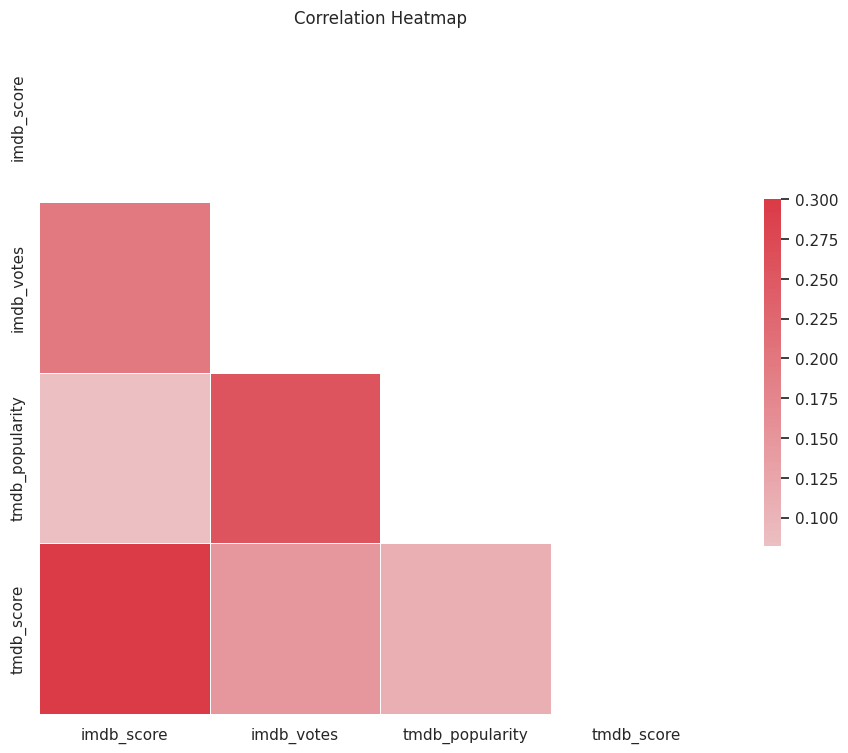

In [118]:
sns.set(style = "white")

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

#Part 4: XPath [15 points]


So far, we've looked at Amazon Prime film data. Let's change our scope to look at the most successful films of all time! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [wikipedia.org](https://en.wikipedia.org/wiki/List_of_highest-grossing_films), we have tables with lists of highest grossing film data.

We get the DOM tree for you below.  Recall that the DOM tree is just a tree made up of objects, which are **elements**, **attributes**, or **text nodes** (and a few other things we'll ignore).  Any XML or HTML document can be parsed to build a DOM tree.

## Key XPath Concept Review

We use XPath to match *tree patterns* against DOM trees.

XPath has a few main ideas:

* Navigation over structure
  - Child element by position
    - $node$ `[i]` returns the $i$th child of $node$
    - Note that this is **1-based**, i.e., $node$ `[1]` is the first child
  - Child element by name  ($node$ `/` *step*)
    - Note you can combine the above 2 ideas, e.g., $node$ `/` *step*`[2]` is the 2nd *step* child
  - Child attributes ($node$ `/@attr`)
  - Child text values ($node$ `/text()`)
  - We can generalize each of the above by replacing a single `/` with a `//`, which now finds matches that are *children* or *descendants*.
    - e.g., $node$ `//text()` would return *any* text content within $node$

* Predicates
  - $node$ `[` *test* `]` evaluates whether a test is satisfied by $node$
    - e.g., $node$ `[a]` means there exists at least one `a` child
    - e.g., $node$ `[@attr="b"]` means there exists an `attr` attribute with value b


In this question, we'll build incrementally to this.  We'll attach nodes to DOM trees, and match XPaths against these.

Recall that XPaths return *ordered node sets*, or in Python this really means they return *lists of nodes from the document*, in the order in which the nodes appeared, without duplicates.

We will use the syntax:

```
node_set = variable_representing_node.xpath("...")
```

to get an output node set from an initial DOM node. We can also:

```
for node in node_set:
  print(node.xpath("..."))
```

or the like.

Here's a helper function...

In [119]:
## Simple pretty-printer, from https://stackoverflow.com/questions/5086922/python-pretty-xml-printer-with-lxml

from typing import Optional

import lxml.etree

def indent_lxml(element: lxml.etree.Element, level: int = 0, is_last_child: bool = True) -> None:
    space = "  "
    indent_str = "\n" + level * space

    element.text = strip_or_null(element.text)
    if element.text:
        element.text = f"{indent_str}{space}{element.text}"

    num_children = len(element)
    if num_children:
        element.text = f"{element.text or ''}{indent_str}{space}"

        for index, child in enumerate(element.iterchildren()):
            is_last = index == num_children - 1
            indent_lxml(child, level + 1, is_last)

    elif element.text:
        element.text += indent_str

    tail_level = max(0, level - 1) if is_last_child else level
    tail_indent = "\n" + tail_level * space
    tail = strip_or_null(element.tail)
    element.tail = f"{indent_str}{tail}{tail_indent}" if tail else tail_indent


def strip_or_null(text: Optional[str]) -> Optional[str]:
    if text is not None:
        return text.strip() or None

Let's see it in action, first to view the entire HTML document.

In [120]:
# Request the data and build the DOM tree (we've done this for you!)

w = requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")
dom_tree = html.fromstring(w.content)
print(dom_tree)

indent_lxml(dom_tree)  # corrects indentation "in place"

result = lxml.etree.tostring(dom_tree, encoding="unicode")
print(result)

<Element html at 0x7dcb893facf0>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
  <head>
    <meta charset="UTF-8"/>
    <title>
      List of highest-grossing films - Wikipedia
    </title>
    <script>
      (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-

## 4.1: Update dom_tree to get only the highest grossing films in 2022 adjusted for inflation

Note the webpage has multiple tables. To find all of these tables we can use the xpath `//table/*`

In [122]:
for node in dom_tree.xpath("//table/*"):
  result = lxml.etree.tostring(node, encoding="unicode")
  print('**')
  print(result)

**
<caption>
                      Highest-grossing films
                      <sup id="cite_ref-12" class="reference">
                        <a href="#cite_note-12">
                          <span class="cite-bracket">
                            [
                          </span>
                          12
                          <span class="cite-bracket">
                            ]
                          </span>
                        </a>
                      </sup>
                    </caption>
                    
**
<tbody>
                      <tr>
                        <th>
                          Rank
                        </th>
                        <th>
                          Peak
                        </th>
                        <th>
                          Title
                        </th>
                        <th>
                          Worldwide gross
                        </th>
                        <th>
                

We are only interested in the table with the highest grossing films adjusted for inflation (second table).
TODO:
- Create `updated_dom_tree` to contain the tbody element of the movie table.


**Hint**: What does each index of the above xpath search contain?

In [125]:
## Find all tables, then select the second table, then extract tbody element node
updated_dom_tree = dom_tree.xpath("//table")[1].xpath(".//tbody")[0]

result = lxml.etree.tostring(updated_dom_tree, encoding="unicode")
print(result)

<tbody>
                      <tr>
                        <th scope="col">
                          Rank
                        </th>
                        <th scope="col">
                          Title
                        </th>
                        <th scope="col" data-sort-type="currency">
                          <div style="display: inline-block; line-height: 1.2em; padding: .1em 0;">
                            Worldwide gross
                            <br/>
                            <span style="font-size:85%;">
                              (2023 $)
                            </span>
                          </div>
                        </th>
                        <th scope="col">
                          Year
                        </th>
                      </tr>
                      <tr>
                        <td>
                          1
                        </td>
                        <th scope="row">
                          <i>
    

## 4.2 Film Names (3 points)

TODO: Create `x_path_film_name` and `film_names`.

`x_path_film_name` should be the value you pass in for updated_dom_tree.xpath() to retrieve names of the films.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: Since we updated the dom tree to start at the table we don't need '/.../table', we can instead start the xpath with the next element after 'table' we want. It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_film_name` string

Return `film_names` which is a list with all the film names.


In [134]:
# TODO: Define the xpath string

x_path_film_name = ".//tr/th[@scope='row']//a/text()"


film_names = updated_dom_tree.xpath(x_path_film_name)
film_names = list(filter(None, map(str.strip, film_names)))

In [135]:
# TEST CASE: xpath_captain_names (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_films', answer = film_names)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.3 Worldwide Gross (3 points)
TODO: Create `x_path_gross` and `gross`

This should be very similar to scraping film names. Change the xpath accordingly to get the worldwide gross column of the table into a list!

`x_path_gross` is the xpath string to pass into updated_dom_tree.xpath() to retrive worldwide gross of each film.

`gross` is the list of worldwide gross values. Elements in this list should be integers, without any null or newline strings.

In [147]:
x_path_gross =  ".//td[contains(@style, 'text-align:right')]/text()"
all_gross = updated_dom_tree.xpath(x_path_gross)
gross = []
for value in all_gross:
    cleaned_value = re.sub(r'[^\d]', '', value)  # Remove anything that is not a digit
    if cleaned_value:
        gross.append(int(cleaned_value))

In [148]:
# TEST CASE: xpath_teams (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_gross', answer = gross)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.4 Putting it together (3 points)

Create a dataframe called `films_df` by using the `film_names` and `gross` lists that you created in 4.2 and 4.3.

The dataframe should have 2 columns. The first should be called `film_name`. The second should be called `gross`. The data for these columns should come from the lists.

In [140]:
films_df = pd.DataFrame({'film_name': film_names, 'gross': gross})

In [141]:
# TEST CASE: xpath_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'xpath_df', answer = films_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.5 Summary Statistics (2 points)

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `film_name` column and save the summary to `film_stats`

In [149]:
film_stats = films_df['film_name'].describe()

In [150]:
# TEST CASE: captain_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'film_stats', answer = film_stats)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.6 Timeline of Highest Grossing Films (4 points)
Similar to previous parts, update dom_tree to obtain a cleaned list of the highest grossing films in chronological order, using the fourth table. Return this as the list `timeline_stats`. Be sure to filter any unneccessary characters out, such as "R" and '‡'

In [151]:
## using the fourth table
updated_dom_tree_4 = dom_tree.xpath("//table")[3].xpath(".//tbody")[0]
result_4 = lxml.etree.tostring(updated_dom_tree_4, encoding="unicode")
timeline_stats = updated_dom_tree_4.xpath('.//td/i/a/text()')
timeline_stats = [name.strip() for name in timeline_stats]

In [152]:
# TEST CASE: timeline_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'timeline_stats', answer = timeline_stats)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# HW Submission

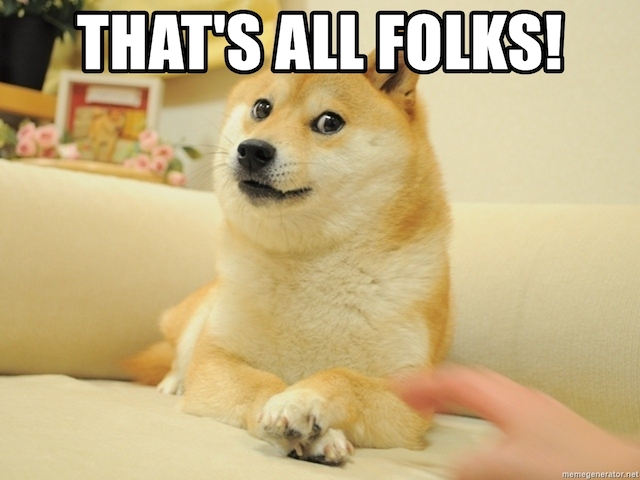

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! There is one question we're manually grading (and we'll check for plagirism), but for the most part things are relatively certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**.
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and download both the .ipynb and .py files, renaming them as "homework1.ipynb" and "homework1.py" respectively. Upload both files to Gradescope directly!

**You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0).**

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**